# Pet Subscription Box Analysis

## About the Company
PetMind is a nationwide pet product retailer in the United States. With inflation hitting 41-year
highs, the company is planning to reduce the cost of customer retention by improving brand
loyalty. 

### Strategy
- The strategy is to launch a monthly pet box subscription. 

- The marketing team is preparing a list of popular products for the pet box subscription.



## Objective
The chief marketing officer wants to know whether the list should only include the products being purchased more than once.

### Questions to answer
- How many products are being purchased more than once?
- Do the products being purchased again have better sales than others?
- What products are more likely to be purchased again for different types of pets?

## Data validation

- Load Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('pet_sales.csv')

In [2]:
# Print a few lines of data
df.head(10)

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0
5,4609,Bedding,"$183,000",51.60,VC_1174,large,cat,10,0
6,4380,Toys,"$79,000",175.75,VC_945,extra_small,dog,8,0
7,4389,Bedding,"$205,000",170.01,VC_954,large,cat,9,0
8,4697,Supplements,"$116,000",178.11,VC_1262,small,cat,10,0
9,4238,Medicine,"$141,000",248.07,VC_803,medium,dog,10,1


- View data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [4]:
df.product_id = df.product_id.astype(str)


In [5]:
# Check for missing values
df.isna().any()

product_id          False
product_category    False
sales               False
price               False
vendor_id           False
pet_size            False
pet_type            False
rating              False
re_buy              False
dtype: bool

In [6]:
def dtypeis(serie):
    return df[serie].dtype
for serie in df.columns:
    print(dtypeis(serie))

object
object
object
float64
object
object
object
int64
int64


- Check the validation of columns

In [7]:
# Check the unique identifier of 'Product ID' & 'Vendor ID'

print(
      df.product_id.duplicated().any()
 )
print(
      df.vendor_id.duplicated().any()
 )


False
False


In [8]:
# Check qualitative variables

df[['product_category', 'pet_size', 'pet_type']].describe(include= 'object')

,product_category,pet_size,pet_type
count,879,879,879
unique,11,5,6
top,Equipment,small,cat
freq,141,280,347


There are 11 Product categories, 5 Pet sizes, but 6 Pet type when the designed type is 4

In [9]:
## View pet_type values:

df.pet_type.value_counts()

cat        347
dog        347
fish        70
bird        69
hamster     23
rabbit      23
Name: pet_type, dtype: int64

In [10]:
## Validated pet type are 'cat', 'dog', 'fish', 'bird', so we just keep only these values

df = df[df.pet_type.isin(['cat', 'dog', 'fish', 'bird'])]

In [11]:
## The sales columns are seires of string type, we need convert into numeric

df.sales = df.sales.str.strip('$').str.replace(",", "").astype('int64')

In [12]:
## Check all quantitative variables

df[['sales', 'price', 'rating', 're_buy']].describe()

,sales,price,rating,re_buy
count,833.000000,833.000000,833.000000,833.000000
mean,116100.840336,127.994802,6.530612,0.468187
std,66324.790235,72.552580,2.843572,0.499287
min,3000.000000,0.350000,1.000000,0.000000
25%,59000.000000,63.300000,5.000000,0.000000
50%,116000.000000,129.520000,6.000000,0.000000
75%,177000.000000,189.250000,10.000000,1.000000
max,230000.000000,252.690000,10.000000,1.000000


In [13]:
## The rating is between 1 and 10, match the validation criteria
## View re_buy values

df.re_buy.value_counts()

0    443
1    390
Name: re_buy, dtype: int64

In [14]:
## re_buy seems ok
## A look at dataset after validating

print(
    df.info()
)

print(
    df.head(10)
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        833 non-null    object 
 1   product_category  833 non-null    object 
 2   sales             833 non-null    int64  
 3   price             833 non-null    float64
 4   vendor_id         833 non-null    object 
 5   pet_size          833 non-null    object 
 6   pet_type          833 non-null    object 
 7   rating            833 non-null    int64  
 8   re_buy            833 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 65.1+ KB
None
   product_id product_category   sales  ...  pet_type rating re_buy
0        5040        Equipment  123000  ...      fish      7      1
1        4567             Toys   61000  ...       cat     10      0
3        4364            Snack   69000  ...       dog      1      1
4        4184      Supplements  138000 

## Customer Questions

#### 1. How many products are being purchased more than once?

product_category
Accessory      20
Bedding        24
Clothes        19
Equipment      69
Food           37
Grooming       17
Housing        20
Medicine       37
Snack          59
Supplements    30
Toys           58
Name: re_buy, dtype: int64


Text(0.5, 1.0, 'No. of products re-bought by category')

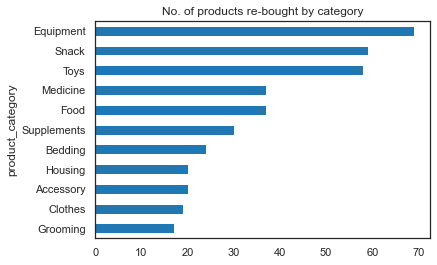

In [15]:
## Summarize number of re-bought products by Product category
product_rebuy = df.groupby('product_category').re_buy.sum()

print(product_rebuy)

## Plot values
sns.set_theme(style="white", palette=None)
product_rebuy.sort_values().plot.barh()
plt.title('No. of products re-bought by category')

#### !Insight
Equipment, Snack, Toys are the most re-bought products with more than 70 of Equipment and more than 60 of Snack & Toys
On the opposite, Accessory, Housing & Grooming are the least re-bought products with only 20 products of each category

#### 2. Do the products being purchased again have better sales than others?

re_buy
0    $51,125,000.00
1    $45,587,000.00
Name: sales, dtype: object


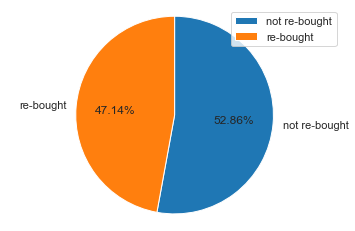

In [16]:
## Show sum of sales of all products between  re-bought & not re-bought category
sales_re_buy = df.pivot_table(  
    index= 're_buy',
    values= 'sales',
    aggfunc=sum    
)

from babel.numbers import format_currency
print(sales_re_buy.sales.apply(lambda x: format_currency(x, currency="USD")))

labels = 'not re-bought', 're-bought'

def func(pct, allvalues):
    return "{:.2f}%\n${:,}".format(pct, allvalues)

fig0, ax = plt.subplots()
ax.pie(
    sales_re_buy.sales, 
    autopct= '%.2f%%',
    labels=labels,
    startangle = 90,
    counterclock = False
    
)
ax.axis('equal')
plt.legend()
plt.show()

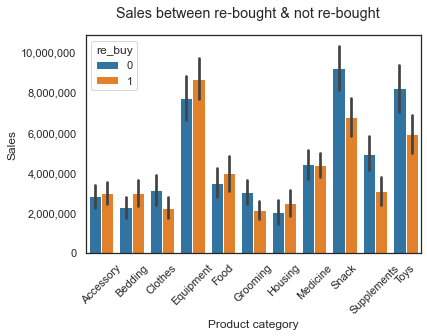

In [17]:
## Plot the graph to show the difference of sales between re-bought & not re-bought category

sns.set_palette("tab10")
fig1, ax = plt.subplots()
fig1.suptitle('Sales between re-bought & not re-bought')

category_order =  df.product_category.unique()
category_order.sort()
sns.barplot(
    data= df,
    x = 'product_category', y='sales',
    estimator=np.sum, 
    hue='re_buy',
    order= category_order,
    ax=ax
    )

ax.set_xlabel('Product category')
plt.xticks(rotation=45)
ax.get_yaxis().set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)
ax.set_ylabel('Sales')

plt.show()

#### !Insight
Although total Number of sales in re-bought product is a slightly more than not re-bought, the different in sales in each categories are various different

#### 3. What products are more likely to be purchased again for different types of pets?

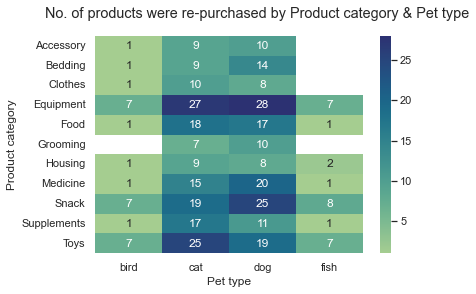

In [18]:
## Draw heatmap to show how many products were re-purchased by Product category & Pet type

df_rebuy_true = df[df.re_buy == 1][['product_id', 'product_category', 'pet_type']]

pivot_rebuy_true = df_rebuy_true.pivot_table(
    index='product_category',
    columns='pet_type',
    values='product_id',
    aggfunc='count'
)

fig2, ax = plt.subplots()
fig2.suptitle('No. of products were re-purchased by Product category & Pet type')
sns.heatmap(pivot_rebuy_true, annot=True,  cmap="crest")
ax.set_xlabel('Pet type')
ax.set_ylabel('Product category')
plt.show()

#### !Insight
As a result of high sales at Equipment, Snack & Toys, these category also had a big amount of products were re-purchased. The most re-purchased Pet type are cat & dog

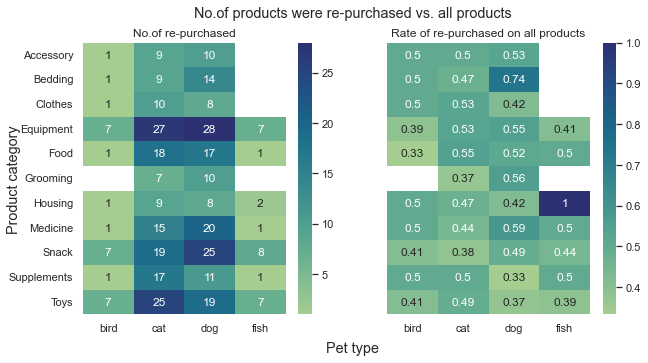

In [19]:
## Draw an additional heatmap to show No.of products were re-purchased vs. not re-purchased
## by Product were purchased category & Pet type

pivot_rebuy_all = df.pivot_table(
    index='product_category',
    columns='pet_type',
    values='product_id',
    aggfunc='count'
)

pivot_rebuy_rate = pivot_rebuy_true/pivot_rebuy_all


fig3, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(10,5), sharey=(True))
fig3.suptitle('No.of products were re-purchased vs. all products')
fig3.supxlabel('Pet type')
fig3.supylabel('Product category')

sns.heatmap(pivot_rebuy_true, annot=True,  cmap="crest", ax=ax0)
ax0.set(xlabel=None, ylabel= None)
ax0.set_title('No.of re-purchased')

sns.heatmap(pivot_rebuy_rate, annot=True,  cmap="crest", ax=ax1)
ax1.set(xlabel=None, ylabel= None)
ax1.set_title('Rate of re-purchased on all products')

plt.show()

#### !Insight
Based on all the product, not high sales mean high re-purchased. The Equipment, Snack & Toys category only had the average rate of re-purchase product. 

All the Fish-Housing products are re-purchased, means customers really liked them

Bedding-Dog products are the second-hightest, and the last product kind had re-purchased rate higher than 0.7. These are another potential products which the company can focus on.

### Conclusion
The Equipment, Snack, Toys, Medicine, Food were the the most popular products, these lead to high re-purchased rate, but some others product category which had high purchased rate didn't have significant sales volume.

The sales between re-purchased & not re-purchased products are not so significant. Pet acessories in the subscription box added could increase the sales of accesories while making the box more interesting and variant. We can not entirely rely upon products which are being purchased more than once.

Besides, the rating of product should also be set as a metric to consider. Some other products needed in daily life should be added too in the subscription box.